In [224]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def sigmoid_decay(initial_value, final_value, steps, steepness, midpoint):
    """ Calculate a sigmoid-like decay for the step size. """
    return final_value + (initial_value - final_value) / (1 + np.exp(steepness * (np.arange(steps) - midpoint)))


def initialize_particles(n, radius):
    """ Initialize particles with a bias towards the center. """
    angles = np.linspace(0, 2 * np.pi, n)
    radii = radius
def initialize_particles_center_bias(n, radius, center_bias=0.7):
    """ Initialize particles with a bias towards the center. """
    angles = np.random.uniform(0, 2 * np.pi, n)
    radii = radius * np.sqrt(np.random.uniform(0, center_bias, n))  # Bias towards center of circle
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

def compute_forces_and_energy_vectorized(particles):
    """ Compute the forces and energy for the current configuration of particles using vectorized operations. """
    
    n = len(particles)
    diff = particles[:, np.newaxis, :] - particles[np.newaxis, :, :]
    distances = np.linalg.norm(diff, axis=2)
    np.fill_diagonal(distances, np.inf)
    energy = np.sum(1 / distances[np.triu_indices(n, 1)])
    forces = np.sum(diff / distances[:,:,np.newaxis]**2, axis=1)

    return forces, energy

def update_particle_positions(particles, step_size, radius):
    """ Update the positions of particles randomly and handle infinitely hard wall boundary conditions. """
    n = len(particles)
    new_particles = np.copy(particles)

    for i in range(n):
        # Generate a random direction
        angle = np.random.uniform(0, 2 * np.pi)
        direction = np.array([np.cos(angle), np.sin(angle)])

        # Update the particle position in the random direction
        new_particles[i] += direction * step_size * np.random.uniform(0, 2)

        # Check if the particle is outside the boundary
        distance_from_center = np.linalg.norm(new_particles[i])

        if distance_from_center > radius:
            # If outside, reposition it on the boundary
            new_particles[i] = new_particles[i] / distance_from_center * radius

    return new_particles


def simulate_charged_particles_annealing(n, radius, steps, initial_step_size, final_step_size, initial_temp, final_temp):
    """ Simulate the charged particles with simulated annealing, updating all particles at once. """
    particles = initialize_particles_center_bias(n, radius)
    min_energy_config = None
    min_energy = np.inf
    energies = []

    temperature = initial_temp
    step_size = initial_step_size

    # Calculate the cooling and step size rates
    cooling_rate = (final_temp / initial_temp) ** (1 / steps)
    step_rate = (final_step_size / initial_step_size) ** (1 / steps)

    for step in range(steps):

        forces, current_energy = compute_forces_and_energy_vectorized(particles)

        # Calculate new positions for all particles
        new_particles = update_particle_positions(particles, step_size, radius)
        new_energy = compute_forces_and_energy_vectorized(new_particles)[1]

        # Decide whether to accept the new configuration
        if new_energy < current_energy or np.random.rand() < np.exp((current_energy - new_energy) / temperature):
            particles = new_particles
            current_energy = new_energy

        if step % 1000 == 0:
            print(step, np.exp((current_energy - new_energy) / temperature), temperature)

        # Update energy, temperature, and step size after each step
        energy = compute_forces_and_energy_vectorized(particles)[1]
        energies.append(energy)

        if energy < min_energy:
            min_energy = energy
            min_energy_config = particles.copy()

       
        temperature = initial_temperature * (cooling_rate ** step)
        step_size *= step_rate

    return min_energy_config, min_energy, energies


def simulate_charged_particles_individual_steps(n, radius, steps, initial_step_size, final_step_size, initial_temp, final_temp):
    """ Simulate the charged particles with simulated annealing, checking each individual particle move. """
    particles = initialize_particles(n, radius)
    min_energy_config = None
    min_energy = np.inf
    energies = []

    temperature = initial_temp
    step_size = initial_step_size



    
    # Parameters
    initial_step_size = 0.6
    final_step_size = 0.02
    total_steps = 10000  # Total number of steps in the simulation
    steepness = 0.1  # Controls how sharp the decay is
    midpoint = total_steps * 0.8  # Point at which the decay starts to accelerate

    # Calculate the step sizes for each step
    step_sizes = sigmoid_decay(initial_step_size, final_step_size, total_steps, steepness, midpoint)
    print(step_sizes)
    # Calculate the cooling and step size rates
    cooling_rate = (final_temp / initial_temp) ** (1 / steps)
    step_rate = (final_step_size / initial_step_size) ** (1 / steps)

    for step in range(steps):
        
        for i in range(n):
            current_energy = compute_forces_and_energy_vectorized(particles, radius)[1]

            # Try moving one particle
            new_particles = particles.copy()
            new_particles[i] = update_particle_positions([particles[i]], step_size, radius)[0]
            new_energy = compute_forces_and_energy_vectorized(new_particles, radius)[1]

            # Decide whether to accept the new position for this particle
            if new_energy < current_energy or np.random.rand() < np.exp((current_energy - new_energy) / temperature):
                particles[i] = new_particles[i]

        # Update energy, temperature, and step size after each step
        energy = compute_forces_and_energy_vectorized(particles, radius)[1]
        energies.append(energy)
        
        if step % 1000 == 0:
            print(step, np.exp((current_energy - new_energy) / temperature), temperature)
            
        if energy < min_energy:
            min_energy = energy
            min_energy_config = particles.copy()

        temperature *= cooling_rate
        step_size = step_sizes[step]
        print(step_size)
    return min_energy_config, min_energy, energies

[0.6  0.6  0.6  ... 0.02 0.02 0.02]
0 0.9853063319868013 275
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6

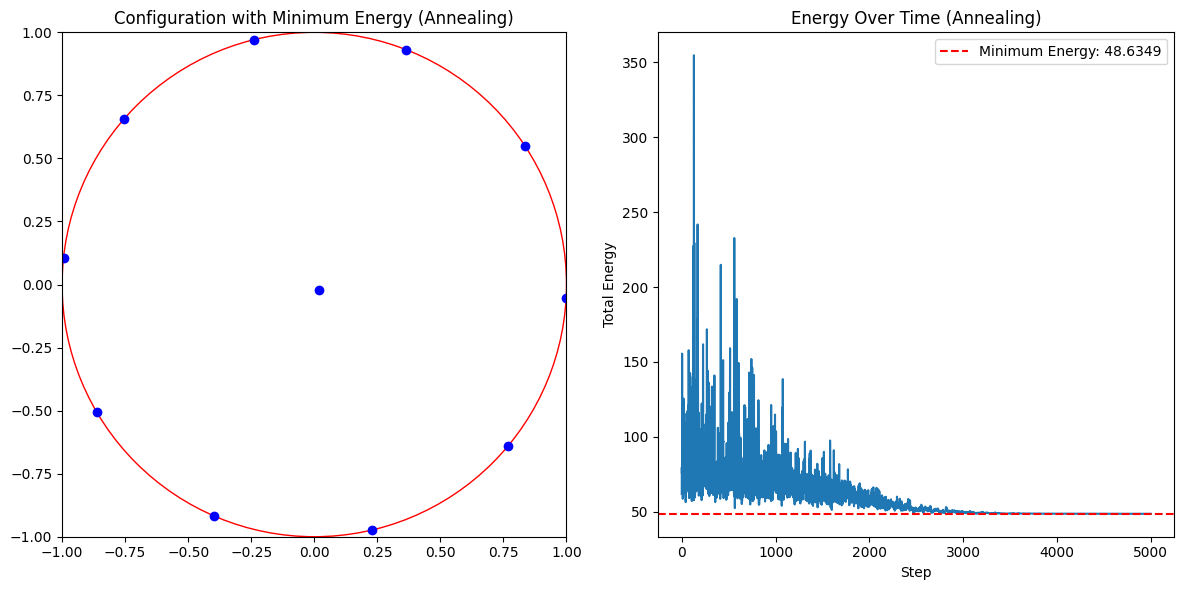

In [225]:

# Parameters
n_particles = 11 # Number of particles
circle_radius = 1
simulation_steps = 20_000
initial_step_size = 0.5
final_step_size = 0.02
initial_temperature = 25 * n_particles
final_temperature = 0.001

# Run the simulation with simulated annealing
annealing_particles, annealing_min_energy, annealing_energy_over_time = simulate_charged_particles_individual_steps(
    n_particles, circle_radius, simulation_steps, initial_step_size, final_step_size, initial_temperature, final_temperature
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Configuration with minimum energy (annealing)
circle = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax[0].add_artist(circle)
ax[0].scatter(annealing_particles[:, 0], annealing_particles[:, 1], color='blue')
ax[0].set_xlim([-circle_radius, circle_radius])
ax[0].set_ylim([-circle_radius, circle_radius])
ax[0].set_title("Configuration with Minimum Energy (Annealing)")
ax[0].set_aspect('equal', 'box')

# Energy over time (annealing)
ax[1].plot(annealing_energy_over_time)
ax[1].set_title("Energy Over Time (Annealing)")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Total Energy")
ax[1].axhline(y=annealing_min_energy, color='r', linestyle='--', label=f'Minimum Energy: {annealing_min_energy:.4f}')
ax[1].legend()

plt.tight_layout()
plt.show()

0 1.1256341116076296 220
1000 1.0023878150020527 64.29547553378046
2000 1.086204203743207 18.7904917005226
3000 1.2547802079665493 5.491561815448432
4000 1.0182093753153327 1.6049208106700352
5000 0.9976317216657583 0.4690415759822277
6000 1.0005679410434558 0.13707841442223223
7000 0.5083270466906304 0.04006146291224563
8000 0.8724946241896118 0.011708049129644309
9000 1.3938290041804641e-25 0.003421702665287926
0 1.0720509159737581 240
1000 1.0477851909398246 69.53286393005372
2000 1.0474009333445435 20.14507985964735
3000 1.09584631121053 5.836437903087173
4000 1.5326899022064142 1.6909343439648672
5000 0.6921900684605236 0.4898979485565158
6000 0.43717764359599925 0.14193336415246924
7000 1.379850711501896 0.04112097206978498
8000 0.6530434782149759 0.011913578981666256
9000 4.954408071440912e-17 0.003451605276050609
0 0.9949927850979221 260
1000 1.108693751454647 74.72673601984368
2000 1.0258806077241298 21.47725029299757
3000 1.0461770669607375 6.172787742603613
4000 0.0026547607

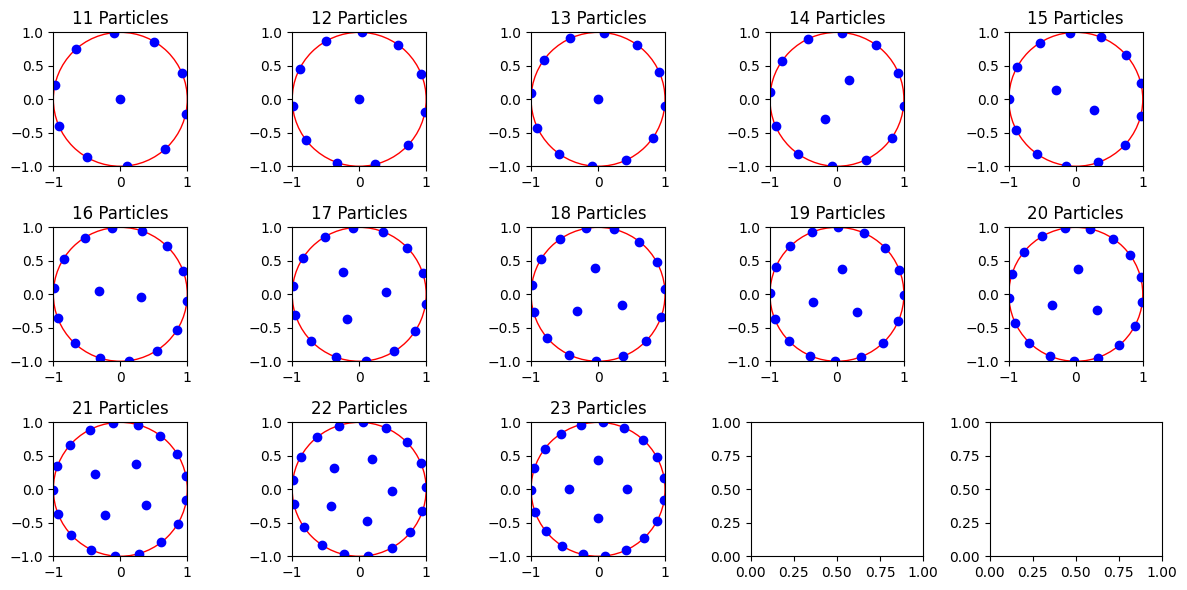

In [220]:

# Parameters
circle_radius = 1
simulation_steps = 10_000
initial_step_size = 0.6
final_step_size = 0.02

final_temperature = 0.001

# Number of rows and columns in the subplot grid
nrows = 3
ncols = 5

# Create a figure with subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6))

# Iterate over the specified number of particles
for i, n_particles in enumerate(range(11, 24)):

    initial_temperature = 20 * n_particles
    # Run the simulation for each particle count
    annealing_particles, _, _ = simulate_charged_particles_individual_steps(
        n_particles, circle_radius, simulation_steps, initial_step_size, final_step_size, initial_temperature, final_temperature
    )

    # Plot the configuration for each particle count
    ax = axes[i // ncols, i % ncols]  # Select the correct subplot
    circle = plt.Circle((0, 0), circle_radius, color='r', fill=False)
    ax.add_artist(circle)
    ax.scatter(annealing_particles[:, 0], annealing_particles[:, 1], color='blue')
    ax.set_xlim([-circle_radius, circle_radius])
    ax.set_ylim([-circle_radius, circle_radius])
    ax.set_title(f"{n_particles} Particles")
    ax.set_aspect('equal', 'box')

plt.tight_layout()
plt.show()

In [53]:
def exponential_cooling(T0,t,a=0.9):
    return T0*a**t

def linear_cooling(T0,t,e):
    return T0-t*e

def logarithmic_cooling(T0,t,c,d):
    return c/np.log(t+d)


### Exponential cooling

In [54]:
def simulate_exp_annealing(n, radius, steps, initial_step_size, final_step_size, initial_temp, final_temp):
    """ Simulate the charged particles with simulated annealing, updating all particles at once. """
    particles = initialize_particles_center_bias(n, radius)
    min_energy_config = None
    min_energy = np.inf
    energies = []

    temperature = initial_temp
    step_size = initial_step_size

    # Calculate the cooling and step size rates
    # cooling_rate = (final_temp / initial_temp) ** (1 / steps)
    step_rate = (final_step_size / initial_step_size) ** (1 / steps)

    for step in range(steps):

        forces, current_energy = compute_forces_and_energy_vectorized(particles, radius)

        # Calculate new positions for all particles
        new_particles = update_particle_positions(particles, step_size, radius)
        new_energy = compute_forces_and_energy_vectorized(new_particles, radius)[1]

        # Decide whether to accept the new configuration
        if new_energy < current_energy or np.random.rand() < np.exp((current_energy - new_energy) / temperature):
            particles = new_particles
            current_energy = new_energy
        print(step, np.exp((current_energy - new_energy) / temperature), temperature)
        # Update energy, temperature, and step size after each step
        energy = compute_forces_and_energy_vectorized(particles, radius)[1]
        energies.append(energy)

        if energy < min_energy:
            min_energy = energy
            min_energy_config = particles.copy()

       
        temperature = exponential_cooling(initial_temperature,step,0.99)
        step_size *= step_rate

    return min_energy_config, min_energy, energies

In [55]:

# Parameters
n_particles = 11  # Number of particles
circle_radius = 1  # Radius of the circle
simulation_steps = 7500  # Number of steps in the simulation
initial_step_size = 0.3
final_step_size = 0.01
initial_temperature = 250  # Reduced initial temperature
final_temperature = 0.001  # Reduced final temperature


# Run the simulation with simulated annealing
annealing_particles, annealing_min_energy, annealing_energy_over_time = simulate_exp_annealing(
    n_particles, circle_radius, simulation_steps, initial_step_size, final_step_size, initial_temperature, final_temperature
)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Configuration with minimum energy (annealing)
circle = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax[0].add_artist(circle)
ax[0].scatter(annealing_particles[:, 0], annealing_particles[:, 1], color='blue')
ax[0].set_xlim([-circle_radius, circle_radius])
ax[0].set_ylim([-circle_radius, circle_radius])
ax[0].set_title("Configuration with Minimum Energy (Annealing)")
ax[0].set_aspect('equal', 'box')

# Energy over time (annealing)
ax[1].plot(annealing_energy_over_time)
ax[1].set_title("Energy Over Time (Annealing)")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Total Energy")
ax[1].axhline(y=annealing_min_energy, color='r', linestyle='--', label=f'Minimum Energy: {annealing_min_energy:.4f}')
ax[1].legend()

plt.tight_layout()
plt.show()

TypeError: compute_forces_and_energy_vectorized() takes 1 positional argument but 2 were given